In [ ]:
pip install pysd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.3/148.3 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 36.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 19.7 MB/s eta 0:00:00
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160672 sha256=b66357e8c0bc3e87f8002821aa561f82e263fb2b0631906bc6a6741cae69cdc3
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy
  Attempting uninstall: xarray
    Found existing installation: xarray 2023.7.0
    Uninstalling xarray-2023.7.0:
      Successfully uninstalled xarray-2023.7.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pickle
import pandas as pd
import sqlite3
import numpy as np
%pylab inline
import pysd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Populating the interactive namespace from numpy and matplotlib


In [ ]:
model = pysd.read_vensim('/content/drive/MyDrive/Yannis/Systems Dynamics/Teacup.mdl')

In [ ]:
values = model.run()
values.head(5)

FINAL TIME  INITIAL TIME  SAVEPER  TIME STEP  Characteristic Time  \
time                                                                       
0.000          30             0    0.125      0.125                   10   
0.125          30             0    0.125      0.125                   10   
0.250          30             0    0.125      0.125                   10   
0.375          30             0    0.125      0.125                   10   
0.500          30             0    0.125      0.125                   10   

       Heat Loss to Room  Room Temperature  Teacup Temperature  
time                                                            
0.000          11.000000                70          180.000000  
0.125          10.862500                70          178.625000  
0.250          10.726719                70          177.267188  
0.375          10.592635                70          175.926348  
0.500          10.460227                70          174.602268

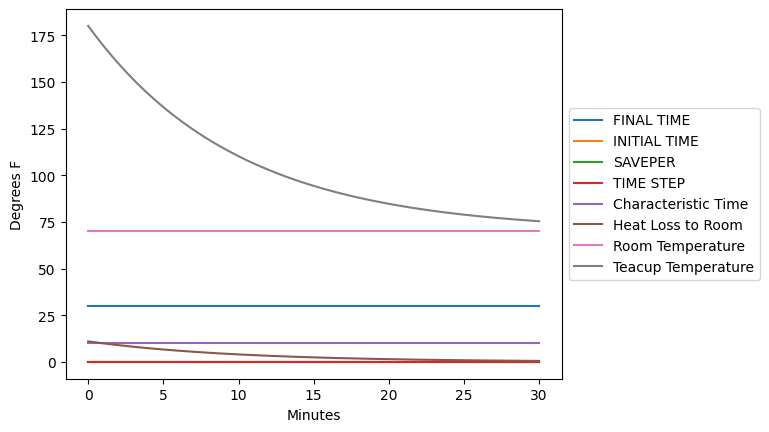

In [ ]:
values.plot()
plt.ylabel('Degrees F')
plt.xlabel('Minutes')
plt.legend(loc='center left', bbox_to_anchor=(1,.5));

Teacup Temperature  Room Temperature
time                                       
0.000          180.000000                70
0.125          178.625000                70
0.250          177.267188                70
0.375          175.926348                70
0.500          174.602268                70

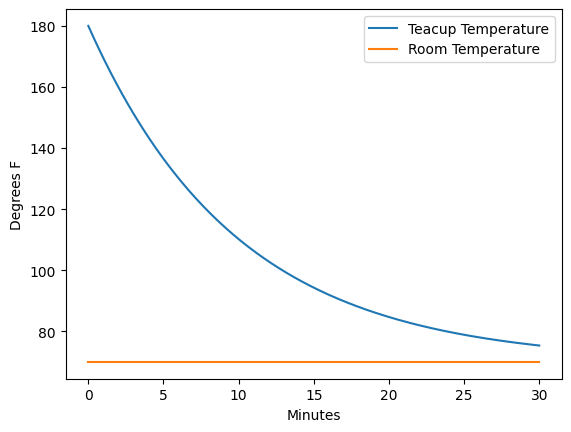

In [ ]:
values = model.run(return_columns=['Teacup Temperature', 'Room Temperature'])
values.plot()
plt.ylabel('Degrees F')
plt.xlabel('Minutes')
values.head()

Teacup Temperature
time                    
0.0           180.000000
1.0           169.469405
3.0           151.336071
7.0           124.383922
9.5           112.287559

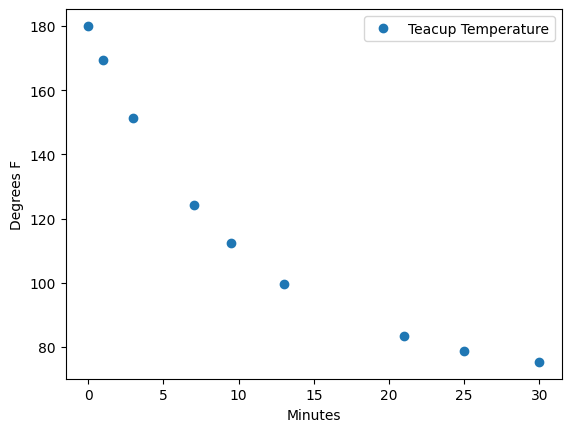

In [ ]:
stocks = model.run(return_timestamps=[0,1,3,7,9.5, 13, 21, 25, 30],
                   return_columns=['Teacup Temperature'])
stocks.plot(linewidth=0, marker='o')
plt.ylabel('Degrees F')
plt.xlabel('Minutes')
stocks.head()

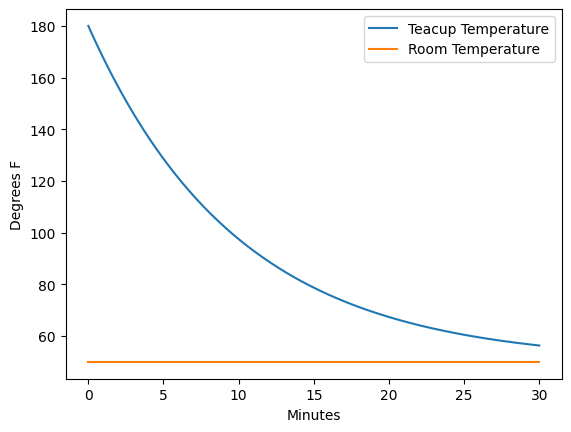

In [ ]:
values = model.run(params={'Room Temperature':50},
                   return_columns=['Teacup Temperature', 'Room Temperature'])
values.plot()
plt.ylabel('Degrees F')
plt.xlabel('Minutes');

/usr/local/lib/python3.10/dist-packages/pysd/py_backend/model.py:1119: UserWarning: Replacing a constant value with a time-dependent value. The value will be interpolated over time.
  warnings.warn(


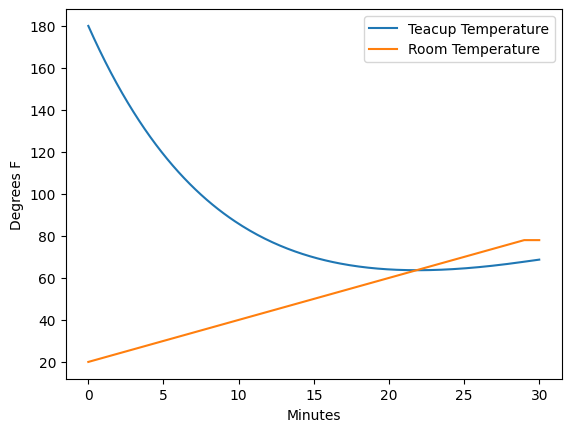

In [ ]:
import pandas as pd
temp_timeseries = pd.Series(index=range(30), data=range(20,80,2))
values = model.run(params={'Room Temperature':temp_timeseries},
                   return_columns=['Teacup Temperature', 'Room Temperature'])
values.plot()
plt.ylabel('Degrees F')
plt.xlabel('Minutes');

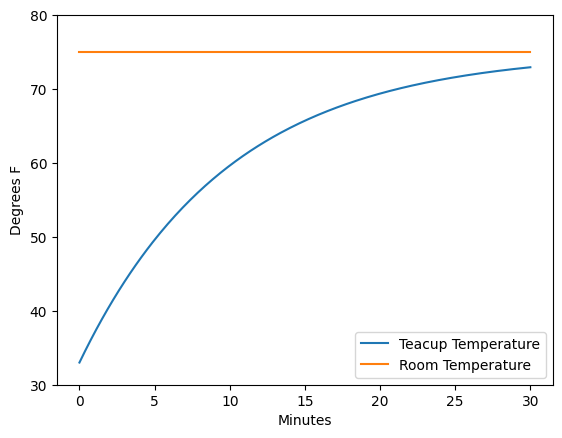

In [ ]:
stocks = model.run(params={'room_temperature':75},
                   initial_condition=(0, {'teacup_temperature':33}),
                   return_columns=['Teacup Temperature', 'Room Temperature'])
stocks.plot()
plt.ylabel('Degrees F')
plt.ylim(30,80)
plt.xlabel('Minutes');

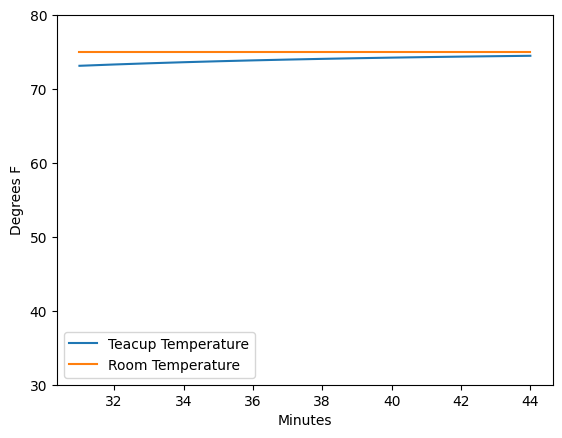

In [ ]:
values = model.run(initial_condition='current',
                   return_columns=['Teacup Temperature', 'Room Temperature'],
                   return_timestamps=list(range(31,45)))
values.plot()
plt.ylabel('Degrees F')
plt.ylim(30,80)
plt.xlabel('Minutes');